In [1]:
import re
from soynlp.tokenizer import RegexTokenizer

def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [3]:
import pandas as pd

In [158]:
df = pd.read_csv("../data/AI_speaker_naver_news.csv")

In [159]:
df.head()

,Unnamed: 0,title,publisher,date,url,texts
0,0,"에이아이더, AI 음성복제 솔루션 '와이즈클로닝 봇' 출시",데이터넷,10시간 전,http://www.datanet.co.kr/news/articleView.html...,NaN
1,1,`어벤져스 광풍` 스마트폰 액세서리·AI스피커·장난감까지,지피코리아,12시간 전,http://www.gpkorea.com/news/articleView.html?i...,NaN
2,2,“칫솔로 원격 진료”…IFA 3대 키워드는 'AI·5G·공동 혁신’,조선비즈,16시간 전,https://news.naver.com/main/read.nhn?mode=LSD&...,칫솔로 원격 진료…빨랫감 찍으면 세탁 모드 추천‘IFA 2019’ AI 가전이 대세...
3,3,"병실에 AI스피커...SKT-연세의료원, 국내 첫 '5G 디지털혁신병원' 연다",포쓰저널,1일 전,http://www.4th.kr/news/articleView.html?idxno=...,NaN
4,4,"내년 2월 문 여는 용인세브란스 병원엔 AI스피커, AR표지판 들어간다",경향신문,1일 전,https://news.naver.com/main/read.nhn?mode=LSD&...,SK텔레콤 제공내년 2월 문을 여는 용인세브란스 병원에 SK텔레콤의 5G기술이 대거...


In [139]:
df.text[0]

'저희 집에는 인공지능스피커인 카카오 미니와 클로버가 있어요.그리고 얼마 전 SKT 누구 미니(NUGU mini)가 새로운 식구로 들어왔습니다.\n카카오 미니와 클로버에 비해 크기가 참 작습니다.한 손에 쏙 들어오는 사이즈예요.화이트, 티탄, 핑크, 민트, 바이올렛 5가지 컬러 선택이 가능합니다.저는 늘 그렇듯 어디에나 잘 어울리고 때 타지 않는 티탄으로~결정!!\n작은 박스에는 NUGU mini 본체와 충전 케이블, 간단 사용설명서와 품질보증서가 들어있습니다.\n고급스러운 티탄 컬러는 언제 봐도 싫증 나지 않는 무난함을 가지고 있습니다.\xa0NUGU mini 윗면에는 음성인식 버튼, 소리 조절 버튼과 음소거 버튼이 있어요.뒤쪽으로는 전원, 블루투스 버튼과 라인아웃, 전원 단자가 보입니다.제품 바닥에는 등록번호와 제조일자가 적혀 있어요.\xa0 \n바닥 부분에 미끄럼 방지 패드가 있어 어느 곳에 놓아도 미끄러지지 않는 장점도 가지고 있습니다.\n인공지능스피커로 사용하기 위해서는\xa0 핸드폰에 NUGU 어플을 설치하고 네트워크 연결이 필수입니다.저는 아이폰을 사용 중이니 앱스토어에서\xa0 NUGU를 검색해 어플을 설치했습니다.\n마이크, 위치, 사진 접근 권한을 허용해주어야 NUGU 앱 사용이 가능합니다.T 아이디\xa0 신규 가입으로 로그인을 하면 됩니다.(저는 이미 T 아이디가 있어요~)\nNUGU 연결하기입니다. NUGU mini를 선택합니다.\n연한 녹색 불빛을 확인해주세요.Wi-Fi 연결 준비가 되었습니다.\n제품 바닥에 적혀있는 등록번호를 입력한 후 확인 버튼을 누릅니다.\n이제 스마트폰과 NUGU mini의 연결이 완료되었습니다.마지막으로 NUGU mini와 와이파이를 연결한 후 스마트폰의 설정 Wi-Fi에서 NUGU mini를 선택하면 끝납니다.\n인공지능 스피커 SKT 누구 미니(NUGU mini)는 인터넷 티브이 B TV와 멜론과 연계되어 활용이 쉽습니다.\n완전히 충전한 후에는 4~5시간 정도 사용이 가능한 배터리를 가지고 있어요. 음성

In [160]:
notnull_df = df[df.texts.notnull()]

In [161]:
tokenizer = RegexTokenizer()
sentences = notnull_df['texts'].apply(preprocessing)
tokens = sentences.apply(tokenizer.tokenize)

In [152]:
import platform
from matplotlib import font_manager, rc

# 그래프 그릴 때 폰트 설정
#plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    font_path = "/System/Library/Fonts/AppleGothic.ttf"
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

In [162]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

Unable to locate an executable at "/Library/Java/JavaVirtualMachines/jdk1.8.0_201.jdk/Contents/Home/bin/apt" (-1)


In [163]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
stopwords = open('/Users/Taewoo/Desktop/graduate_school /yonsei/class/text_mining/pyTextMiner/stopwordsKor_hs.txt', 'r', encoding='UTF8')
lines = stopwords.read().splitlines()
stopwords.close()

(-0.5, 799.5, 599.5, -0.5)

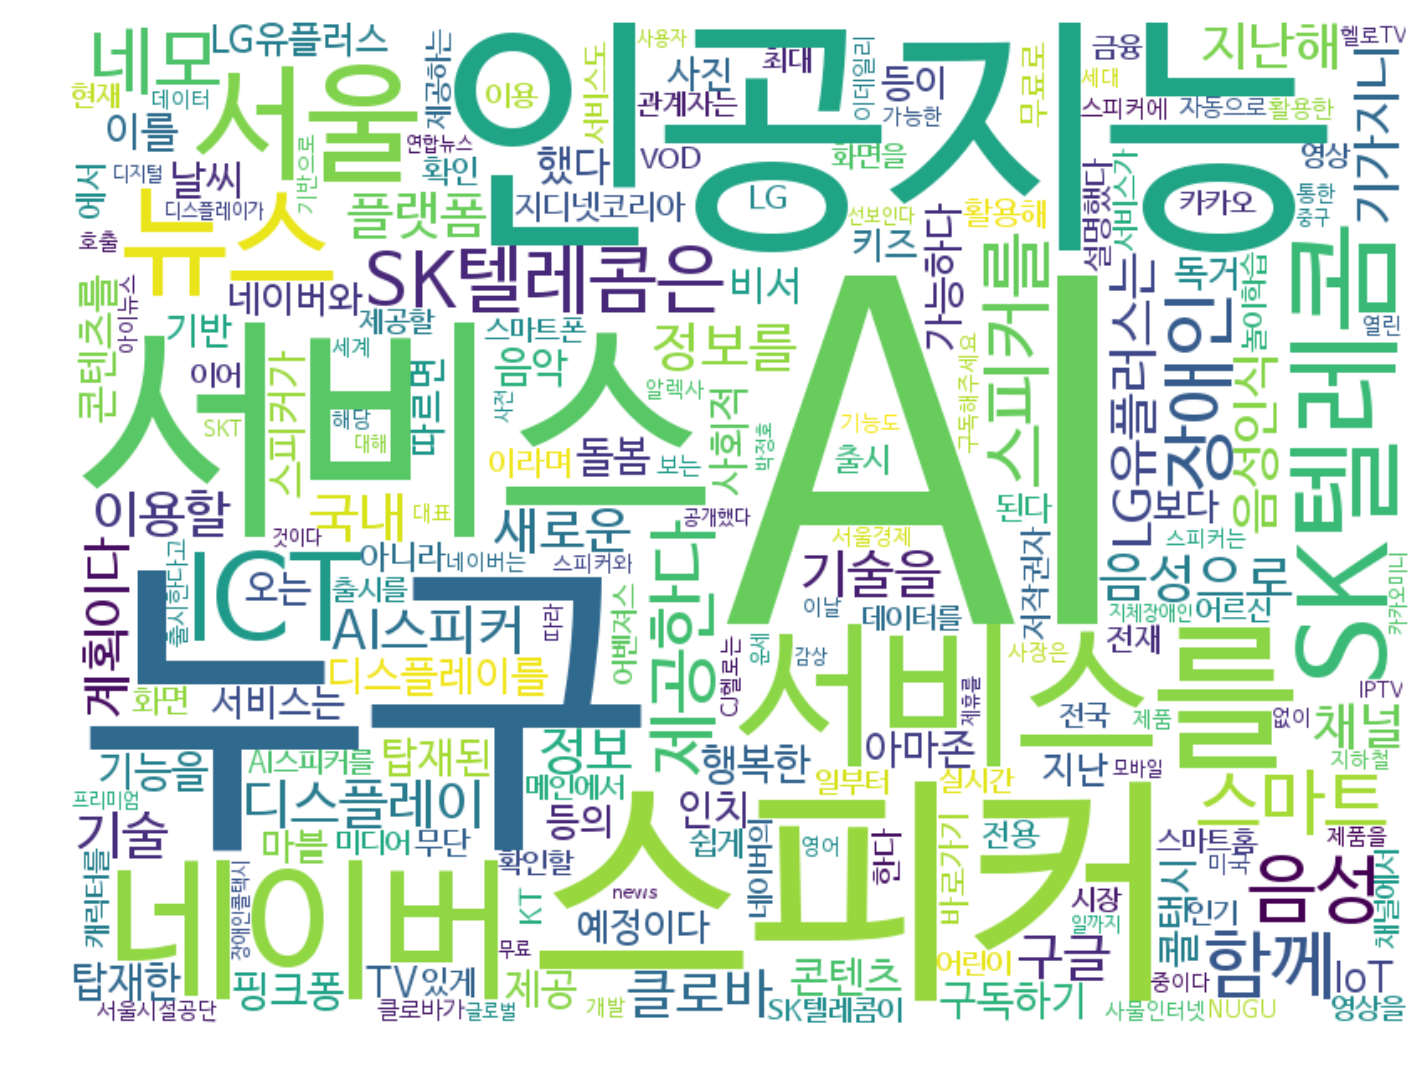

In [165]:
wordcloud = WordCloud(
    font_path = fontpath,
    width = 800,
    height = 600,
    stopwords = lines,
    background_color="white",
    collocations=False
)

wordcloud = wordcloud.generate(' '.join(sentences))

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [166]:
print('[', end="")
for i, (word, value) in enumerate(sorted(wordcloud.words_.items(), key=lambda x:x[1], reverse=True)[:20]):
    if i == 19:
        print("('{}', {:.3f})".format(word, round(value, 3)), end="")
    else:
        print("('{}', {:.3f}),".format(word, round(value, 3)))
print(']', end="")

[('AI', 1.000),
('누구', 0.375),
('인공지능', 0.333),
('스피커', 0.307),
('서비스', 0.295),
('서비스를', 0.254),
('네이버', 0.243),
('서울', 0.149),
('뉴스', 0.143),
('SK텔레콤', 0.138),
('ICT', 0.133),
('SK텔레콤은', 0.132),
('장애인', 0.130),
('음성', 0.129),
('함께', 0.121),
('네모', 0.121),
('스마트', 0.118),
('스피커를', 0.117),
('제공한다', 0.115),
('디스플레이', 0.110)]

In [43]:
tokens

NameError: name 'tokens' is not defined

In [45]:
wordcloud.max_words

200